# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [3]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

### Step 3. Assign it to a variable called `chipo`.

In [5]:
chipo = pd.read_csv(url, sep="\t")

### Step 4. Display the first 10 entries.

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

In [37]:
top_5 = chipo.groupby('item_name')["quantity"].sum().sort_values( ascending = False)[0:5]
top_5

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

Text(0.5, 1.0, "Most ordered Chipotle's Items")

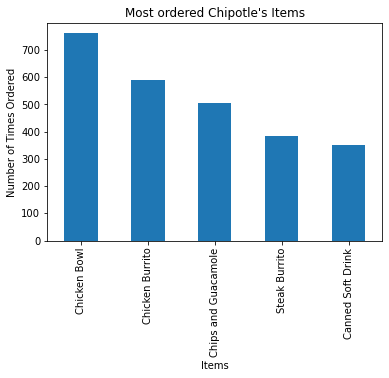

In [15]:
top_5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

In [34]:
# an other way
top_5= chipo.item_name.value_counts()[0:5]
top_5

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

Text(0.5, 1.0, "Most ordered Chipotle's Items")

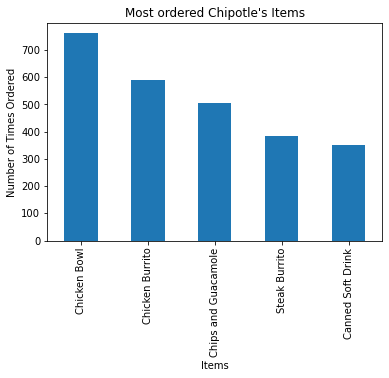

In [16]:
top_5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

In [31]:
# an other way
top_5 = chipo.groupby('item_name').agg({"quantity":"sum"}).sort_values("quantity",ascending = False)[0:5]
top_5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


Text(0.5, 1.0, "Most ordered Chipotle's Items")

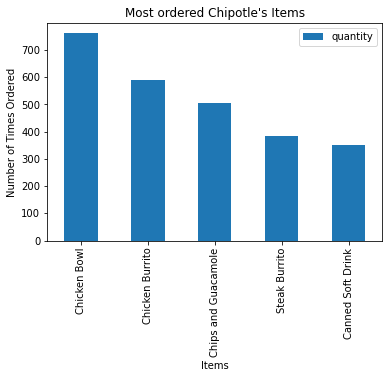

In [22]:
top_5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

In [23]:
top_5.reset_index()

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

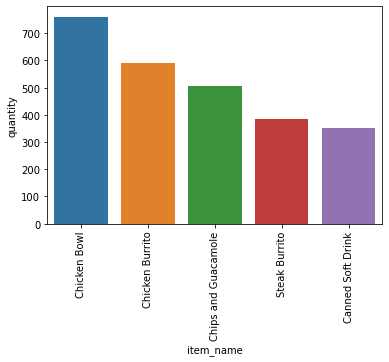

In [30]:
# beter plot

sns.barplot(
    x= "item_name",
    y= "quantity",
    data=top_5.reset_index(),
)
plt.xticks(rotation="vertical")

### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

In [40]:
price= chipo.item_price.str.slice(1).astype(float)  
price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [43]:
chipo["price"]= price 

<AxesSubplot:xlabel='price', ylabel='quantity'>

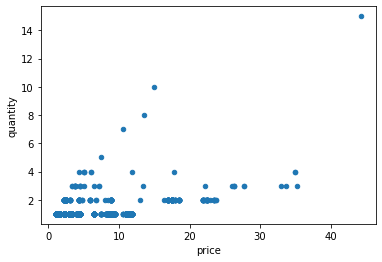

In [44]:
chipo.plot(x="price", y="quantity", kind= "scatter")

<AxesSubplot:xlabel='price', ylabel='quantity'>

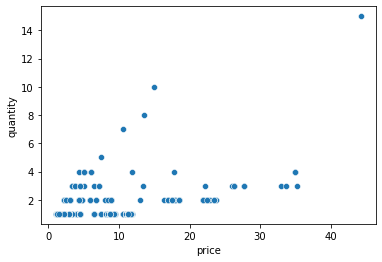

In [45]:
sns.scatterplot(x="price", y="quantity", data=chipo)

(0.0, 36.7)

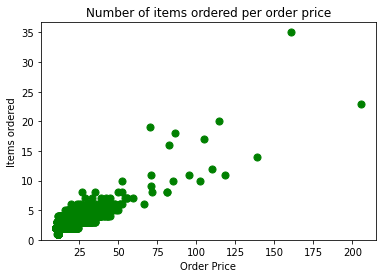

In [46]:
#best way

# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### BONUS: Create a question and a graph to answer your own question.

In [47]:
#youtube.com/watch?v=BLD2mAB3kaw